In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 national and provincial.csv


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../input/housing-affordability-in-canada/HPI 1981-2022 national and provincial.csv', 
                 skiprows=8, skipfooter=27, engine='python')
df.rename(columns={'Unnamed: 0': 'type'}, inplace=True)
df.type.fillna(method='ffill', inplace=True)
df[['month', 'year']] = df['Month-Year'].str.split('-', expand=True)
df.insert(2, 'year', df.pop('year'))
df.insert(2, 'month', df.pop('month'))
with_caution = df.apply(lambda x: x.str.endswith('E'))
df = df.apply(lambda x: x.str.strip('E'))
df.year = df.year.astype('int')
df.year = df.year.apply(lambda x: x + 1900 if x > 23 else x + 2000)
df.loc[:,'Canada':] = df.loc[:,'Canada':].astype('float')
df

,type,Month-Year,month,year,Canada,Atlantic Region,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,...,"Windsor, Ontario","Greater Sudbury, Ontario 12",Prairie Region,Manitoba,Saskatchewan,Alberta,British Columbia 13,"Kelowna, British Columbia","Vancouver, British Columbia","Victoria, British Columbia"
0,Total (house and land),Dec-81,Dec,1981,40.3,NaN,NaN,NaN,NaN,NaN,...,58.3,58.2,NaN,NaN,NaN,NaN,NaN,NaN,77.8,126.0
1,Total (house and land),Jan-82,Jan,1982,40.3,NaN,NaN,NaN,NaN,NaN,...,58.3,58.2,NaN,NaN,NaN,NaN,NaN,NaN,77.5,126.0
2,Total (house and land),Feb-82,Feb,1982,40.3,NaN,NaN,NaN,NaN,NaN,...,58.3,58.5,NaN,NaN,NaN,NaN,NaN,NaN,76.8,121.8
3,Total (house and land),Mar-82,Mar,1982,40.1,NaN,NaN,NaN,NaN,NaN,...,58.3,58.7,NaN,NaN,NaN,NaN,NaN,NaN,74.3,119.0
4,Total (house and land),Apr-82,Apr,1982,39.9,NaN,NaN,NaN,NaN,NaN,...,58.3,58.2,NaN,NaN,NaN,NaN,NaN,NaN,73.1,117.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,Land only,Dec-21,Dec,2021,115.2,102.8,102.4,103.1,103.5,102.5,...,133.1,118.8,103.4,110.0,100.7,102.8,117.9,118.3,118.9,108.7
1451,Land only,Jan-22,Jan,2022,115.5,102.8,102.4,103.1,103.5,102.5,...,133.1,118.8,103.6,110.2,100.8,103.0,118.6,118.3,119.7,108.7
1452,Land only,Feb-22,Feb,2022,116.1,102.8,102.4,103.1,103.5,102.5,...,136.5,118.8,104.1,110.2,100.8,103.7,119.7,118.6,120.9,108.7
1453,Land only,Mar-22,Mar,2022,116.5,102.8,102.4,104.5,103.5,102.5,...,136.5,118.8,104.9,110.4,101.1,104.6,120.2,118.6,121.3,111.4


In [4]:
pd.merge(df.loc[:,'Atlantic Region':].sum(axis=1).rename('Regions'), df.Canada, 
         left_index=True, right_index=True)

,Regions,Canada
0,586.1,40.3
1,587.5,40.3
2,583.4,40.3
3,578.6,40.1
4,575.6,39.9
...,...,...
1450,3403.0,115.2
1451,3407.7,115.5
1452,3419.2,116.1
1453,3432.2,116.5


In [5]:
df_compare = pd.melt(df, id_vars=['type', 'Month-Year', 'month', 'year']) \
    .pivot(index=['variable', 'Month-Year', 'month', 'year'], columns='type', values='value')
df_compare['diff = House + Land - Total'] = df_compare['House only'] + df_compare['Land only'] - \
df_compare['Total (house and land)']
df_compare

type                                    House only  Land only  \
variable         Month-Year month year                          
Alberta          Apr-00     Apr   2000        47.8       43.1   
                 Apr-01     Apr   2001        48.6       44.4   
                 Apr-02     Apr   2002        51.8       45.5   
                 Apr-03     Apr   2003        55.1       47.5   
                 Apr-04     Apr   2004        58.0       49.8   
...                                            ...        ...   
Windsor, Ontario Sep-95     Sep   1995        88.8       85.3   
                 Sep-96     Sep   1996        88.8       85.3   
                 Sep-97     Sep   1997        94.8       84.9   
                 Sep-98     Sep   1998        94.2       84.9   
                 Sep-99     Sep   1999        95.8       84.9   

type                                    Total (house and land)  \
variable         Month-Year month year                           
Alberta          Apr-00     Apr   2000                    46.1   
                 Apr-01     Apr   2001                    46.9   
                 Apr-02     Apr   2002                    49.4   
                 Apr-03     Apr   2003                    52.2   
                 Apr-04     Apr   2004                    55.0   
...                                                        ...   
Windsor, Ontario Sep-95     Sep   1995                    87.7   
                 Sep-96     Sep   1996                    87.7   
                 Sep-97     Sep   1997                    91.7   
                 Sep-98     Sep   1998                    91.2   
                 Sep-99     Sep   1999                    92.4   

type                                    diff = House + Land - Total  
variable         Month-Year month year                               
Alberta          Apr-00     Apr   2000                         44.8  
                 Apr-01     Apr   2001                         46.1  
                 Apr-02     Apr   2002                         47.9  
                 Apr-03     Apr   2003                         50.4  
                 Apr-04     Apr   2004                         52.8  
...                                                             ...  
Windsor, Ontario Sep-95     Sep   1995                         86.4  
                 Sep-96     Sep   1996                         86.4  
                 Sep-97     Sep   1997                         88.0  
                 Sep-98     Sep   1998                         87.9  
                 Sep-99     Sep   1999                         88.3  

[15035 rows x 4 columns]

Overall number of NaN values: 9648


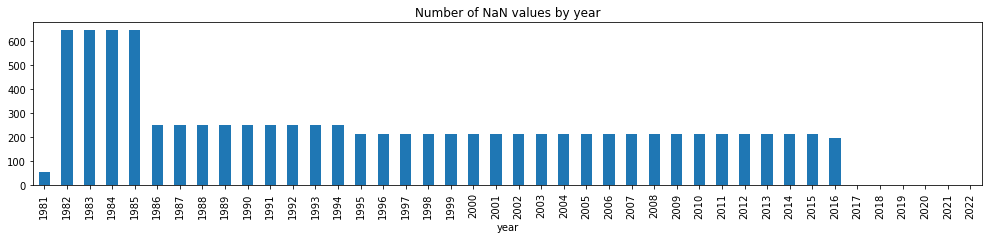

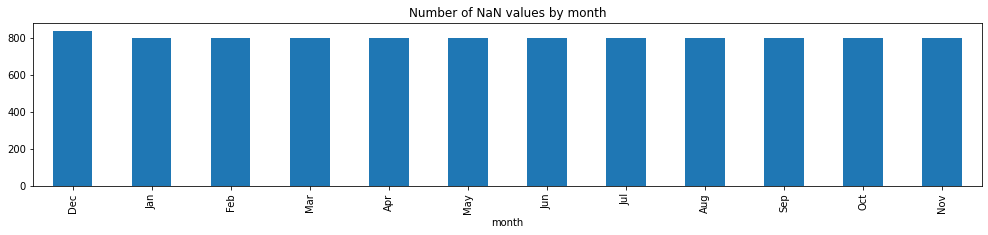

In [6]:
print(f'Overall number of NaN values: {df.isna().sum().sum()}')
plot_na_values = lambda column: df.set_index(column).isna().sum(axis=1) \
    .groupby(column).sum().reindex(df[column].unique()) \
    .plot.bar(width=.5, figsize=(17, 3), rot=90, title=f'Number of NaN values by {column}')
plot_na_values('year')
plt.show();
plot_na_values('month')
plt.show();